In [23]:
# Importing the necessary libraries to use for the assessment

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer

In [24]:
# Importing the dataset

med = pd.read_csv('medical_raw_data.csv',index_col=0)

med

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
1,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3191.048774,17939.403420,3,3,2,2,4,3,3,4
2,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4214.905346,17612.998120,3,4,3,4,4,4,3,3
3,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2177.586768,17505.192460,2,4,4,4,3,4,3,3
4,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2465.118965,12993.437350,3,5,5,3,4,5,5,5
5,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,1885.655137,3716.525786,2,1,3,3,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,9996,B863060,a25b594d-0328-486f-a9b9-0567eb0f9723,39184dc28cc038871912ccc4500049e5,Norlina,NC,Warren,27563,36.42886,-78.23716,...,6651.241294,8927.642189,3,2,2,3,4,3,4,2
9997,9997,P712040,70711574-f7b1-4a17-b15f-48c54564b70f,3cd124ccd43147404292e883bf9ec55c,Milmay,NJ,Atlantic,8340,39.43609,-74.87302,...,7851.522660,28507.147340,3,3,4,2,5,3,4,4
9998,9998,R778890,1d79569d-8e0f-4180-a207-d67ee4527d26,41b770aeee97a5b9e7f69c906a8119d7,Southside,TN,Montgomery,37171,36.36655,-87.29988,...,7725.953391,15281.214660,3,3,3,4,4,2,3,2
9999,9999,E344109,f5a68e69-2a60-409b-a92f-ac0847b27db0,2bb491ef5b1beb1fed758cc6885c167a,Quinn,SD,Pennington,57775,44.10354,-102.01593,...,8462.831883,7781.678412,5,5,3,4,4,3,4,3


In [25]:
# Reviewing each data type for all tables within the dataset

med.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 52 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  Timezone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            7412 non-null   float64
 15  Age                 7586 non-null   float64
 16  Education

In [26]:
# Checking for duplicate rows and values

med.duplicated().sum()

0

'/usr/local/share/datasets/bar_chart.png'

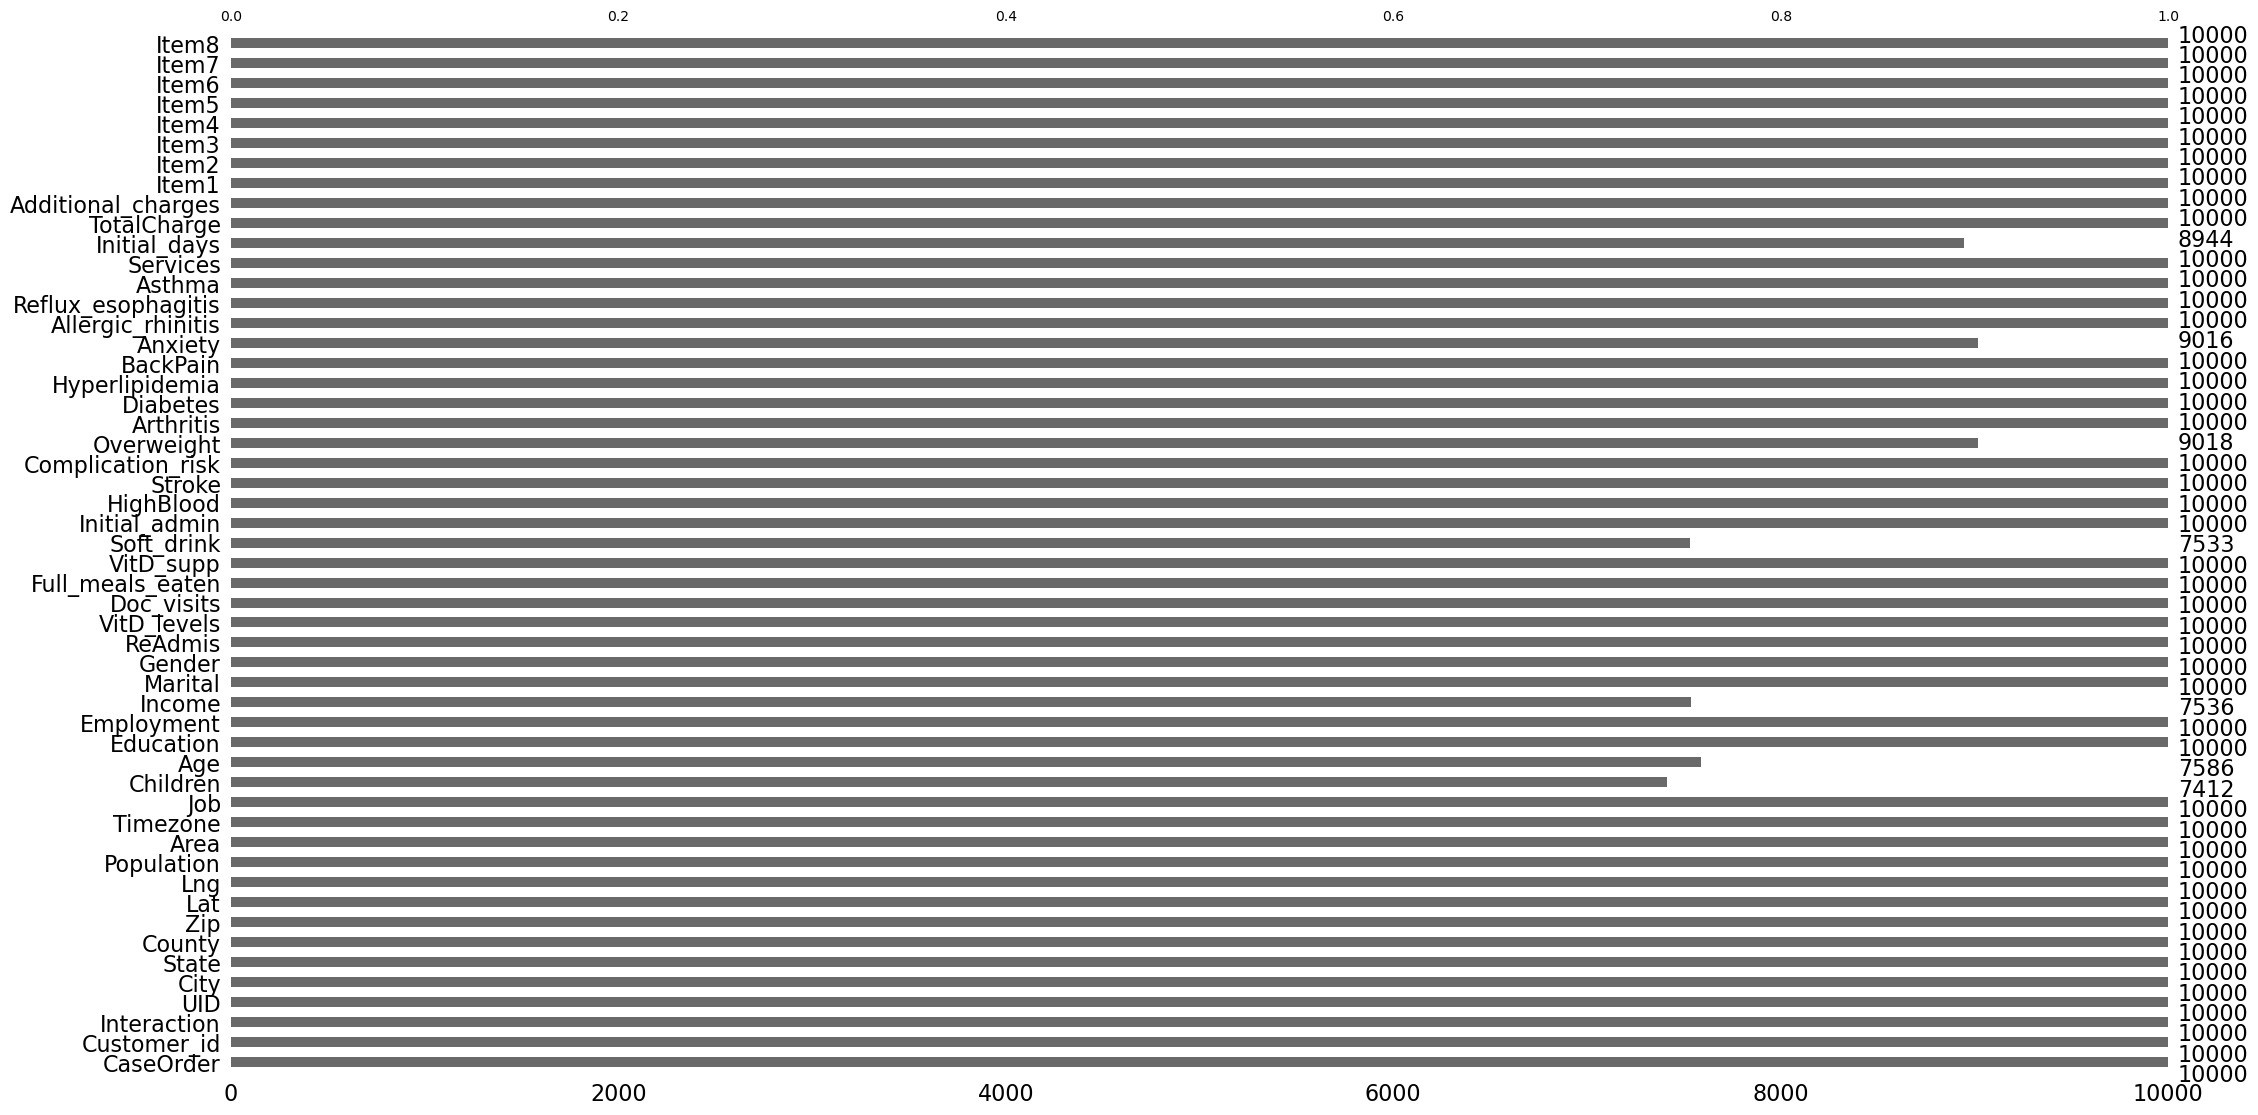

In [27]:
# Plot amount of missingness
msno.bar(med)

# Display bar chart of missing values
display("/usr/local/share/datasets/bar_chart.png")

'/usr/local/share/datasets/matrix.png'

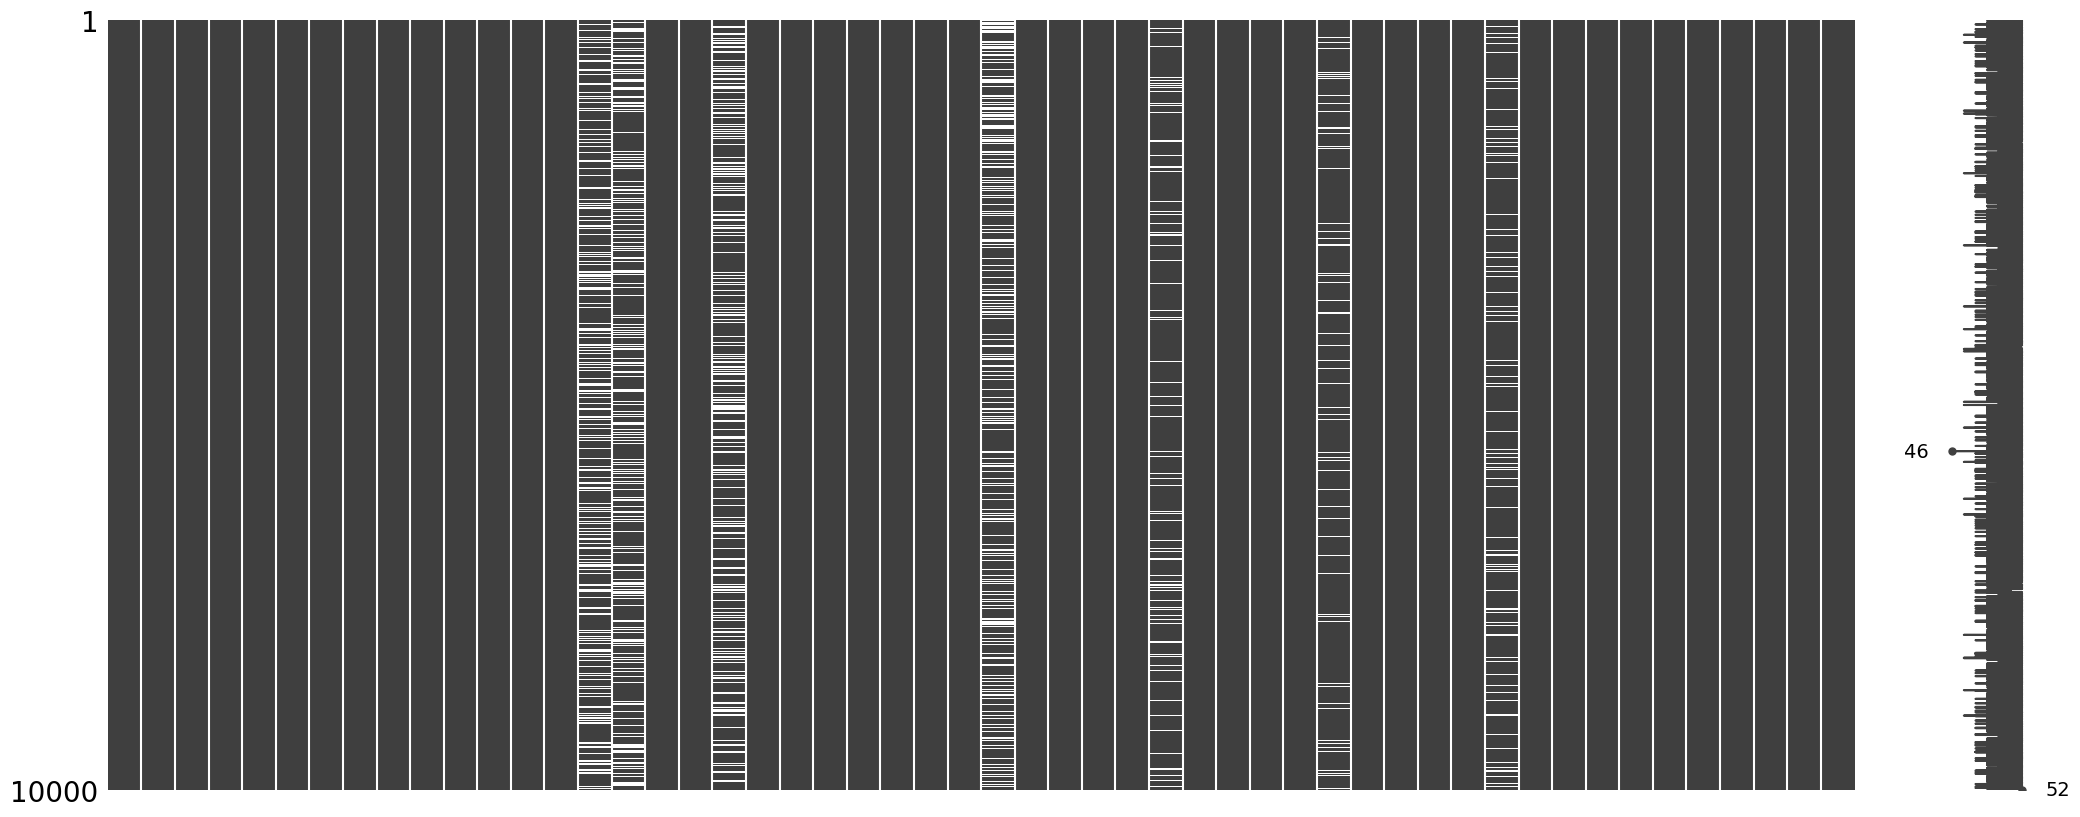

In [28]:
# Plot nullity matrix of med
msno.matrix(med)

# Display nullity matrix
display("/usr/local/share/datasets/matrix.png")

In [29]:
# To verify which columns have null values within the dataset

med.isnull().sum()

CaseOrder                0
Customer_id              0
Interaction              0
UID                      0
City                     0
State                    0
County                   0
Zip                      0
Lat                      0
Lng                      0
Population               0
Area                     0
Timezone                 0
Job                      0
Children              2588
Age                   2414
Education                0
Employment               0
Income                2464
Marital                  0
Gender                   0
ReAdmis                  0
VitD_levels              0
Doc_visits               0
Full_meals_eaten         0
VitD_supp                0
Soft_drink            2467
Initial_admin            0
HighBlood                0
Stroke                   0
Complication_risk        0
Overweight             982
Arthritis                0
Diabetes                 0
Hyperlipidemia           0
BackPain                 0
Anxiety                984
A

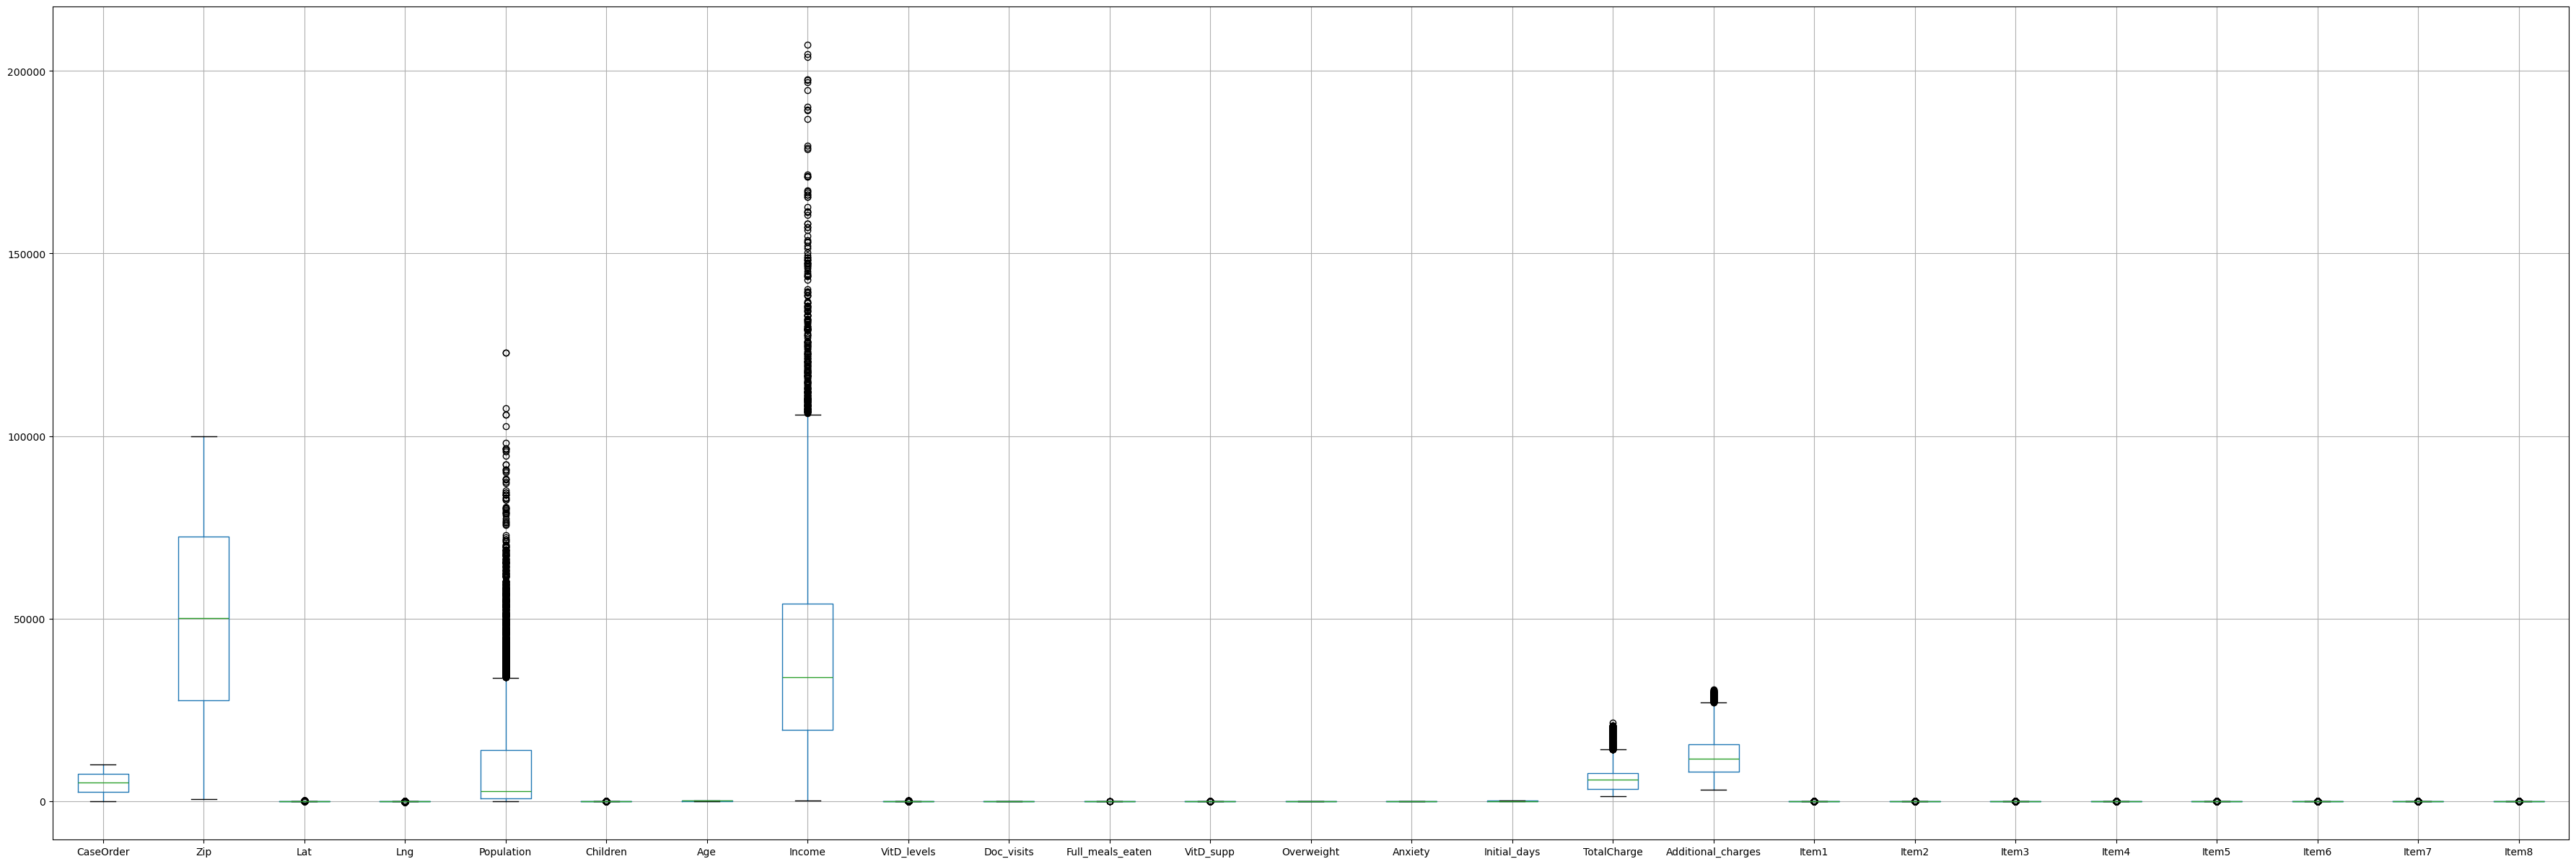

In [30]:
# Using box-and-whisker plot to find outliers

plt.figure(figsize=(45, 15))
med.boxplot()
plt.show()

In [31]:
# To gather all numeric columns because performing the IQR rule doesn't require object data types

med_numeric_dtypes = med.select_dtypes(exclude=['object'])

In [32]:
# Detecting outliers using the Interquartile Range (IQR) rule.
Q1 = med_numeric_dtypes.quantile(0.25)
Q3 = med_numeric_dtypes.quantile(0.75)
IQR = Q3 - Q1

# To find the upper and lower whiskers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

In [33]:
# To indicate the total number of outliers per column

outliers = med_numeric_dtypes[(med_numeric_dtypes <= lower_limit) | (med_numeric_dtypes >= upper_limit)]

outliers_per_col = outliers.count()

outliers_per_col

CaseOrder               0
Zip                     0
Lat                   150
Lng                   237
Population            855
Children              303
Age                     0
Income                252
VitD_levels           534
Doc_visits              8
Full_meals_eaten       33
VitD_supp              70
Overweight              0
Anxiety                 0
Initial_days            0
TotalCharge           466
Additional_charges    424
Item1                 449
Item2                 429
Item3                 443
Item4                 450
Item5                 443
Item6                 443
Item7                 438
Item8                 442
dtype: int64

In [34]:
# To show the total number of outliers overall

outliers_sum = outliers.count().sum()

outliers_sum

6869

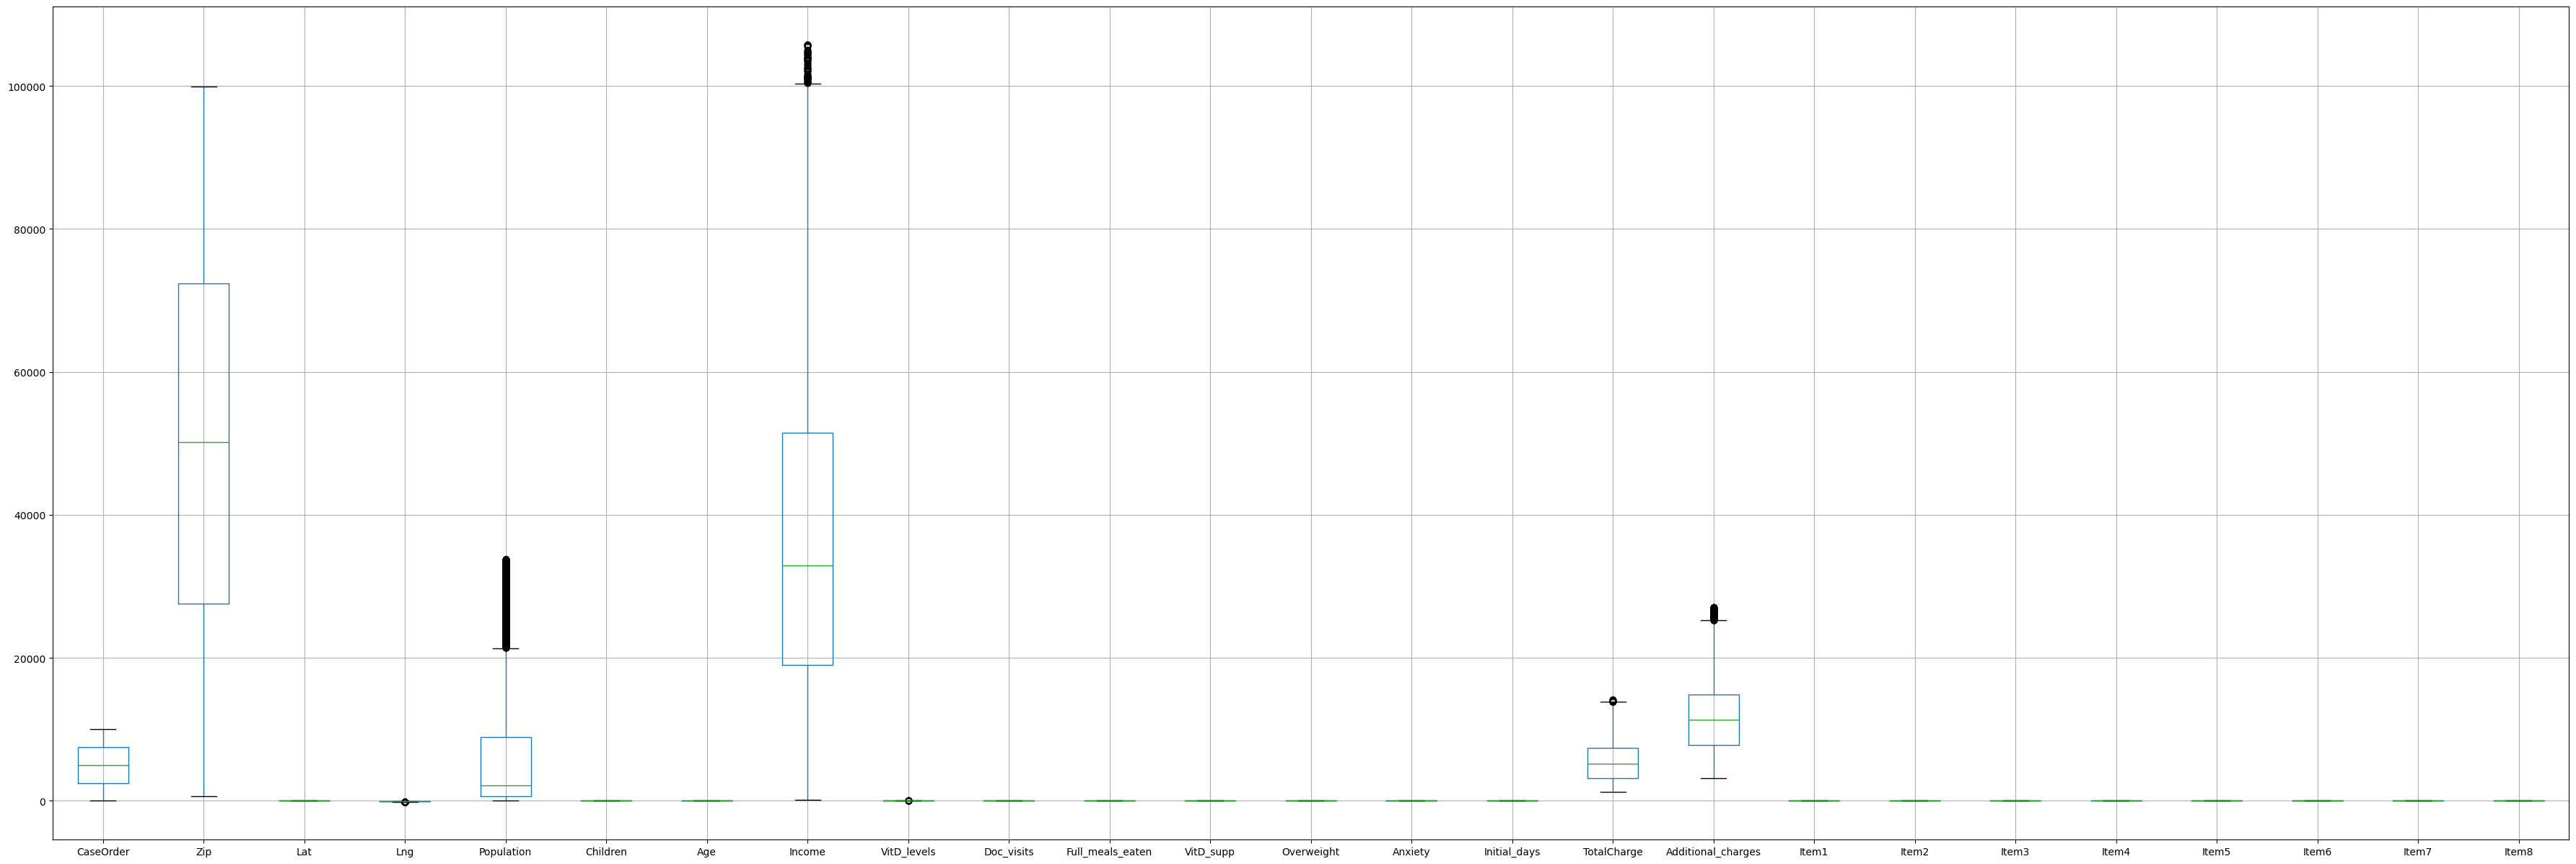

In [35]:
# To display what it would look like if the outliers were removed

med_remove_outliers = med_numeric_dtypes[(med_numeric_dtypes > lower_limit)&(med_numeric_dtypes < upper_limit)]
plt.figure(figsize=(45, 15))
med_remove_outliers.boxplot()
plt.show()

In [36]:
# Creating a DataFrame for null values within the original dataset
med_nullity = med.isnull()


# Calculating the percentage of null values
missing_values_percent = med_nullity.mean() * 100
print('Percentage of Missing Values:\n', missing_values_percent)

Percentage of Missing Values:
 CaseOrder              0.00
Customer_id            0.00
Interaction            0.00
UID                    0.00
City                   0.00
State                  0.00
County                 0.00
Zip                    0.00
Lat                    0.00
Lng                    0.00
Population             0.00
Area                   0.00
Timezone               0.00
Job                    0.00
Children              25.88
Age                   24.14
Education              0.00
Employment             0.00
Income                24.64
Marital                0.00
Gender                 0.00
ReAdmis                0.00
VitD_levels            0.00
Doc_visits             0.00
Full_meals_eaten       0.00
VitD_supp              0.00
Soft_drink            24.67
Initial_admin          0.00
HighBlood              0.00
Stroke                 0.00
Complication_risk      0.00
Overweight             9.82
Arthritis              0.00
Diabetes               0.00
Hyperlipidemia   

In [37]:
# To confirm which columns have null values.

med.columns[med.isnull().any()]

Index(['Children', 'Age', 'Income', 'Soft_drink', 'Overweight', 'Anxiety',
       'Initial_days'],
      dtype='object')

In [38]:
# Checking each data type for the columns with null values.

med[['Children', 'Age', 'Income', 'Soft_drink', 'Overweight', 'Anxiety', 'Initial_days']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Children      7412 non-null   float64
 1   Age           7586 non-null   float64
 2   Income        7536 non-null   float64
 3   Soft_drink    7533 non-null   object 
 4   Overweight    9018 non-null   float64
 5   Anxiety       9016 non-null   float64
 6   Initial_days  8944 non-null   float64
dtypes: float64(6), object(1)
memory usage: 625.0+ KB


In [39]:
# Replacing null values from the Overweight and Anxiety columns because both columns are set with categorical values that are binary (Yes/No).

mode_overweight = med['Overweight'].mode()[0]
med.fillna({'Overweight': mode_overweight}, inplace=True)

mode_anxiety = med['Anxiety'].mode()[0]
med.fillna({'Anxiety': mode_anxiety}, inplace=True)

In [40]:
# Converting numeric columns that have null values into a seperate dataset in order to perform KKN Imputation

med_na = med[['Children', 'Age', 'Income', 'Initial_days']]

med_na

,Children,Age,Income,Initial_days
1,1.0,53.0,86575.93,10.585770
2,3.0,51.0,46805.99,15.129562
3,3.0,53.0,14370.14,4.772177
4,0.0,78.0,39741.49,1.714879
5,NaN,22.0,1209.56,1.254807
...,...,...,...,...
9996,NaN,25.0,45967.61,51.561217
9997,4.0,87.0,14983.02,68.668237
9998,3.0,NaN,65917.81,NaN
9999,3.0,43.0,29702.32,63.356903


In [41]:
# Creating a function to find the most common string to replace the null values in the 'Soft_drink' column

# KNNImputer will not directly take string values unless they are converted into numeric values using One-Hot Encoding or Label Encoding.

most_common_str = max(list(med['Soft_drink']), key=list(med['Soft_drink']).count)

med.fillna({'Soft_drink': most_common_str}, inplace=True)

In [42]:
# Using the numeric null columns to perform KNN

med_imp = med_na.copy(deep=True)

# Initialize KNN
knn_imputer = KNNImputer(n_neighbors=2)

# Convert the now imputed columns into a dataset
med_imp.iloc[:, :] = knn_imputer.fit_transform(med_imp)
med_imp_final = med_imp.iloc[:, :]

In [43]:
# Confirming that the process of KNN Imputation has been completed

med_imp_final.isnull().sum()

Children        0
Age             0
Income          0
Initial_days    0
dtype: int64

In [44]:
# Updating the columns of the original dataset with the imputated columns

med.update(med_imp_final[['Children', 'Age', 'Income', 'Initial_days']])

# To verify that there are no null values within the dataset

med.isnull().sum()

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
Timezone              0
Job                   0
Children              0
Age                   0
Education             0
Employment            0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
VitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days    

In [45]:
# Rounding the numbers for the Children and Age columns because it is illogical to have half of a child. And Age is generally documented as a whole number.


med[['Children', 'Age']] = med[['Children', 'Age']].round()

med[['Children', 'Age']]

,Children,Age
1,1.0,53.0
2,3.0,51.0
3,3.0,53.0
4,0.0,78.0
5,3.0,22.0
...,...,...
9996,0.0,25.0
9997,4.0,87.0
9998,3.0,54.0
9999,3.0,43.0


In [46]:
# Saving the new dataset into a csv file

med.to_csv('medical_data_NStewart_clean.csv', index=False)

In [47]:
# Creating a dataset that includes continuous numeric values of the new spreadsheet

med_numeric_dtypes = med.select_dtypes(exclude=['object'])

med_numeric_dtypes_con = med_numeric_dtypes.loc[:, ~med_numeric_dtypes.columns.isin(['Lat', 'Lng', 'CaseOrder', 'Zip', 'Population', 'Children', 'Age', 'Doc_visits', 'Full_meals_eaten', 'Overweight', 'Anxiety', 'VitD_supp', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'])]

med_numeric_dtypes_con

,Income,VitD_levels,Initial_days,TotalCharge,Additional_charges
1,86575.93,17.802330,10.585770,3191.048774,17939.403420
2,46805.99,18.994640,15.129562,4214.905346,17612.998120
3,14370.14,17.415889,4.772177,2177.586768,17505.192460
4,39741.49,17.420079,1.714879,2465.118965,12993.437350
5,1209.56,16.870524,1.254807,1885.655137,3716.525786
...,...,...,...,...,...
9996,45967.61,16.481612,51.561217,6651.241294,8927.642189
9997,14983.02,18.451601,68.668237,7851.522660,28507.147340
9998,65917.81,15.752751,5.360012,7725.953391,15281.214660
9999,29702.32,21.956305,63.356903,8462.831883,7781.678412


In [48]:
# Normalizing the continuous variables within the dataset that was created.

med_normalized=(med_numeric_dtypes_con-med_numeric_dtypes_con.mean())/med_numeric_dtypes_con.std()

In [49]:
# Performing PCA

pca = PCA(n_components=5)

pca.fit(med_normalized)
med_pca = pd.DataFrame(pca.transform(med_normalized),     
    columns=['PC1','PC2','PC3','PC4','PC5'])

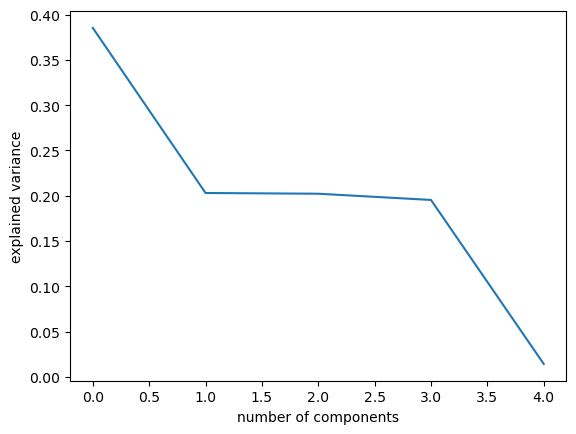

In [50]:
# Running a scree plot on the data

plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

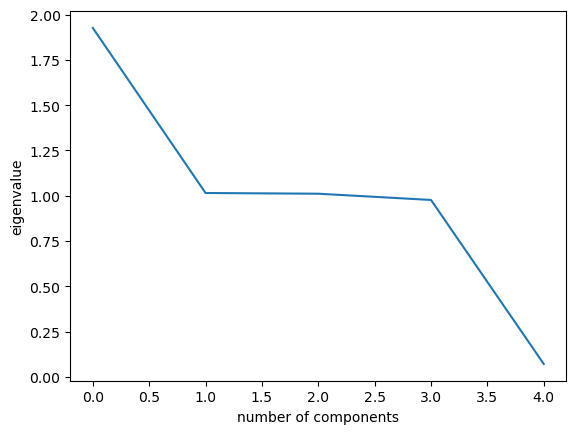

In [51]:
# Creating a scree plot of the eigenvalues 

cov_matrix = np.dot(med_normalized.T, med_normalized) / med_numeric_dtypes_con.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for
eigenvector in pca.components_]

plt.plot(pca.explained_variance_)
plt.xlabel('number of components')
plt.ylabel('eigenvalue')
plt.show()

In [52]:
# Output the loadings for the components of the dataframe

loadings = pd.DataFrame(pca.components_.T,
 columns=['PC1','PC2','PC3','PC4','PC5'], index=med_numeric_dtypes_con.columns)
loadings

,PC1,PC2,PC3,PC4,PC5
Income,-0.004244,-0.140540,0.812212,0.566157,-0.002959
VitD_levels,0.555295,-0.479265,0.165545,-0.355202,-0.555318
Initial_days,0.436007,0.639186,-0.181406,0.419893,-0.438316
TotalCharge,0.707520,0.006783,0.009690,-0.003222,0.706587
Additional_charges,0.030699,-0.584764,-0.529060,0.613985,-0.015070
